<h1> Анализ e-commerce


<H3>Проект e-commerce</H3> 

Продакт-менеджер Василий попросил вас проанализировать совершенные покупки и ответить на следующие вопросы:

1. Сколько у нас пользователей, которые совершили покупку только один раз? <BR>
   (7 баллов) 
   
2. Сколько заказов в месяц в среднем не доставляется по разным причинам <BR>
   (вывести детализацию по причинам)? (10 баллов)
   
3. По каждому товару определить, в какой день недели товар чаще всего <BR>
   покупается. (7 баллов)
   
4. Сколько у каждого из пользователей в среднем покупок в неделю (по месяцам)? <BR>
   Не стоит забывать, что внутри месяца может быть не целое количество недель. <BR>
   Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть. <BR>
   (8 баллов) 
   
5. Используя pandas, проведи когортный анализ пользователей. <BR>
   В период с января по декабрь выяви когорту с самым высоким retention на 3й месяц. <BR>
   Описание подхода можно найти тут. (15 баллов)

6. Часто для качественного анализа аудитории используют подходы, основанные на сегментации. <BR>
   Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить <BR>
   свою аудиторию. В кластеризации можешь выбрать следующие метрики: <BR>
   R - время от последней покупки пользователя до текущей даты, <BR>
   F - суммарное количество покупок у пользователя за всё время, <BR>
   M - сумма покупок за всё время. Подробно опиши, как ты создавал кластеры. <BR>
   Для каждого RFM-сегмента построй границы метрик recency, frequency и monetary <BR>
   для интерпретации этих кластеров. Пример такого описания: <BR>
   RFM-сегмент 132 (recency=1, frequency=3, monetary=2) имеет границы метрик <BR>
   recency от 130 до 500 дней, frequency от 2 до 5 заказов в неделю, <BR>
   monetary от 1780 до 3560 рублей в неделю. <BR>
   Описание подхода можно найти тут. (23 балла) <BR>

Для решения задачи проведи предварительное исследование данных и сформулируй, <BR>
что должно считаться покупкой. Обосновать свой выбор ты можешь <BR>
с помощью фактов оплат, статусов заказов и других имеющихся данных.

<H3>Файлы:</H3>

1) olist_customers_datase.csv — таблица с уникальными идентификаторами пользователей
         
         customer_id — позаказный идентификатор пользователя
         customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта)
         customer_zip_code_prefix —  почтовый индекс пользователя
         customer_city —  город доставки пользователя
         customer_state —  штат доставки пользователя
         
2) olist_orders_dataset.csv —  таблица заказов
         
         order_id —  уникальный идентификатор заказа (номер чека)
         customer_id —  позаказный идентификатор пользователя
         order_status —  статус заказа
         order_purchase_timestamp —  время создания заказа
         order_approved_at —  время подтверждения оплаты заказа
         order_delivered_carrier_date —  время передачи заказа в логистическую службу
         order_delivered_customer_date —  время доставки заказа
         order_estimated_delivery_date —  обещанная дата доставки
         
3) olist_order_items_dataset.csv —  товарные позиции, входящие в заказы
         
         order_id —  уникальный идентификатор заказа (номер чека)
         order_item_id —  идентификатор товара внутри одного заказа
         product_id —  ид товара (аналог штрихкода)
         seller_id — ид производителя товара
         shipping_limit_date —  максимальная дата доставки продавцом для передачи заказа партнеру по логистике
         price —  цена за единицу товара
         freight_value —  вес товара


— Пример структуры данных можно визуализировать по order_id == 00143d0f86d6fbd9f9b38ab440ac16f5

  Уникальные статусы заказов в таблице olist_orders_dataset:
- created —  создан
- approved —  подтверждён
- invoiced —  выставлен счёт
- processing —  в процессе сборки заказа
- shipped —  отгружен со склада
- delivered —  доставлен пользователю
- unavailable —  недоступен
- canceled —  отменён
"""
'''#'''

## <i>БИБЛИОТЕКИ</i>

In [381]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import os
import datetime
from datetime import timedelta
from datetime import datetime
import time
import math
import matplotlib.dates as mdates

## <i>ЗАГРУЗКА ДАННЫХ</i>

In [382]:
# Чтобы узнать текущую дирректорию
os.getcwd()
# Чтобы узнать что лежит в текущей дирректории
os.listdir()

# Пути к файлам .csv
path_df_ids = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/InterProject/olist_customers_dataset.csv'
path_df_orders = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/InterProject/olist_orders_dataset.csv'
path_df_items = '/mnt/HC_Volume_18315164/home-jupyter/jupyter-o-mihalev/InterProject/olist_order_items_dataset.csv'

# Cчитаем DF c помощью лямбда-функции и распарсим колонку со временем
download_df = lambda x: pd.read_csv(x, sep=',') 
#, parse_dates = ['delivery_time']
    
# Присвоим переменную датафрейму
df_ids = download_df(path_df_ids)
df_orders = download_df(path_df_orders)
df_items = download_df(path_df_items)

## <i>ПРОВЕРКА ДАТАФРЕЙМОВ</i>

In [383]:
# Проверим размер DF
print("Размер таблицы с идентификаторами пользователей:\n{}".format(df_ids.shape))
print("Размер таблицы с заказами:\n{}".format(df_orders.shape))
print("Размер таблицы с товарными позициями в заказах:\n{}".format(df_items.shape))

Размер таблицы с идентификаторами пользователей:
(99441, 5)
Размер таблицы с заказами:
(99441, 8)
Размер таблицы с товарными позициями в заказах:
(112650, 7)


In [384]:
# Проверим типы данных столбцов DF
print("Форматы колонок таблицы с идентификаторами пользователей:\n{}".format(df_ids.dtypes), '\n')
print("Форматы колонок таблицы с заказами:\n{}".format(df_orders.dtypes), '\n')
print("Форматы колонок таблицы с товарными позициями в заказах:\n{}".format(df_items.dtypes))

Форматы колонок таблицы с идентификаторами пользователей:
customer_id                 object
customer_unique_id          object
customer_zip_code_prefix     int64
customer_city               object
customer_state              object
dtype: object 

Форматы колонок таблицы с заказами:
order_id                         object
customer_id                      object
order_status                     object
order_purchase_timestamp         object
order_approved_at                object
order_delivered_carrier_date     object
order_delivered_customer_date    object
order_estimated_delivery_date    object
dtype: object 

Форматы колонок таблицы с товарными позициями в заказах:
order_id                object
order_item_id            int64
product_id              object
seller_id               object
shipping_limit_date     object
price                  float64
freight_value          float64
dtype: object


In [385]:
# Проверим DF на пропуски
print("Число пропусков в колонках таблицы с идентификаторами пользователей:\n{}".format(df_ids.isna().sum()), '\n')
print("Число пропусков в колонках таблицы с заказами:\n{}".format(df_orders.isna().sum()), '\n')
print("Число пропусков в колонках таблицы с товарными позициями в заказах:\n{}".format(df_items.isna().sum()))

# Видим пропуски данных в таблице df_orders: 
# 'order_approved_at' —  время подтверждения оплаты заказа
# 'order_delivered_carrier_date' —  время передачи заказа в логистическую службу
# 'order_delivered_customer_date' —  время доставки заказа

Число пропусков в колонках таблицы с идентификаторами пользователей:
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64 

Число пропусков в колонках таблицы с заказами:
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64 

Число пропусков в колонках таблицы с товарными позициями в заказах:
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


## <i>ПРЕОБРАЗОВАНИЕ КОЛОНОК В ДАТЫ</i>

In [386]:
# Сконвертируем типы данных во время (спарсим даты)
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_items.shipping_limit_date = pd.to_datetime(df_items.shipping_limit_date)

# Проверим
print("Форматы колонок таблицы с заказами:\n{}".format(df_orders.dtypes), '\n')
print("Форматы колонок таблицы с товарными позициями в заказах:\n{}".format(df_items.dtypes))

Форматы колонок таблицы с заказами:
order_id                                 object
customer_id                              object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
dtype: object 

Форматы колонок таблицы с товарными позициями в заказах:
order_id                       object
order_item_id                   int64
product_id                     object
seller_id                      object
shipping_limit_date    datetime64[ns]
price                         float64
freight_value                 float64
dtype: object


<H1> 1 ШАГ:<BR><blockquote>ОПРЕДЕЛЕНИЕ КОЛИЧЕСТВА ПОЛЬЗОВАТЕЛЕЙ<BR>С ОДНОЙ ПОКУПКОЙ</blockquote></H1>

In [387]:
# Для начала нужно смерджить таблицы df_ids и df_orders 
# (пользователь по паспорту, а у одного пользователя мб нескольно id)
df_ids_orders = df_ids.merge(df_orders, how='left', on='customer_id') #[['customer_unique_id', 'customer_id', 'order_id']]

"""
ПОКУПКОЙ считается наличие:
1) наличия чека — order_id —  уникальный идентификатор заказа (номер чека) 
2) наличия подтвержденного факта оплаты заказа — order_approved_at —  время подтверждения оплаты заказа
3) наличия отметки о успешной доставки покупателю — order_status —  статус заказа ('delivered ')
4) необязательно -  order_delivered_customer_date —  время доставки заказа — необязательный фактор, тк статус заказа ('delivered ') 
уже говорит о получении заказа покупателем, а данную колонку могли в попыхах и не заполнить!!!

ОДНИМ ПОЛЬЗОВАТЕЛЕМ считается :
1) покупатель, имеющий уникальный номер паспорта — customer_unique_id —  уникальный идентификатор пользователя  (аналог номера паспорта),
а вот уже у ОДНОГО ПОЛЬЗОВАТЕЛЯ мб несколько показанных id или чеков с заказами

В данном случае, имеет смысл считать покупкой - ФАКТ (ВРЕМЯ) СОЗДАНИЯ ЗАКАЗА
Так как пользователи совершают покупки(заказы) исходя из определенных дней, акций, событий,
а вот получают заказ в любое рандомное время как им удобно!!!
Поэтому ориентироваться следует на order_purchase_timestamp —  время создания заказа

А также заказ ДОЛЖЕН БЫТЬ ОПЛАЧЕН И ДОСТАВЛЕН
Но стоит помнимать, что формирование заказа (чека) может быть в 1 день, а вот оплата может быть уже
когда удобно пользователю. Доставка уже идет, а пользователь волен оплачивать в любое время до получения заказа!!!
"""


# Определим кол-во пользователей сделавших 1 покупку (товар доставлен, факт оплаты подтвержден)
users_1order = df_ids_orders.query("order_status == 'delivered' & order_approved_at != 'NaN'")\
                                                        .groupby('customer_unique_id', as_index=False)\
                                                        .agg({'order_id':'count'})\
                                                        .rename(columns={'order_id':'count_orders'})\
                                                        .query("count_orders == 1")\
                                                        .customer_unique_id.value_counts().sum()

print(f'Число пользователей совершивших покупку только один раз = {users_1order} человек')

Число пользователей совершивших покупку только один раз = 90545 человек


<H1> 2 ШАГ:<BR>
    <blockquote>
        СКОЛЬКО ЗАКАЗОВ В МЕСЯЦ В СРЕДНЕМ<BR>
        НЕ ДОСТАВЛЯЕТСЯ ПО РАЗНЫМ ПРИЧИНАМ?<BR>
        [ВЫВЕСТИ ДЕТАЛИЗАЦИЮ ПО ПРИЧИНАМ]
    </blockquote>
</H1>

In [388]:
### (2) ОПРЕДЕЛИМ CКОЛЬКО ЗАКАЗОВ В МЕСЯЦ В СРЕДНЕМ НЕ ДОСТАВЛЯЕТСЯ ПО РАЗНЫМ ПРИЧИНАМ
### [ВЫВЕСТИ ДЕТАЛИЛЗАЦИЮ ПО ПРИЧИНАМ] !!!


''' 
В данном случае, имеет смысл считать покупкой - ФАКТ (ВРЕМЯ) СОЗДАНИЯ ЗАКАЗА
Так как пользователи совершают покупки(заказы) исходя из определенных дней, акций, событий,
а вот получают заказ в любое рандомное время как им удобно!!!
Поэтому ориентироваться следует на order_purchase_timestamp —  время создания заказа



ЗАКАЗ НЕ ДОСТАВЛЯЕТСЯ:
1) наличия отметки о успешной доставки покупателю НЕТ — order_status —  статус заказа ('!= delivered ')
'''

# Посмотреим DF со всеми недоставленными товарами
undelivered_orders = df_orders.query('order_status != "delivered"')\
                                                              .sort_values('order_estimated_delivery_date', ascending=True)



# Сколько заказов в среднем в месяц не доставляется
'''
Так как мы анализируем именно сколько заказов НЕ ДОСТАВЛЯЕТСЯ, то
используем дату создания заказа 'order_purchase_timestamp', 
а не время создания заказа 'order_estimated_delivery_date' ИМЕННО что бы понимать какие ЗАКАЗЫ не доставляются
'''

# Нужно выделить YYYY-MM, для того чтобы можно было наблюдать за каждым месяцем
undelivered_orders.order_purchase_timestamp = undelivered_orders.order_purchase_timestamp.dt.strftime('%Y-%m')

# "order_status" - причины
undelivered_in_month = undelivered_orders.groupby(["order_purchase_timestamp"],as_index=False)\
                                .agg({"order_id":"count"})\
                                .rename(columns={"order_id":"count_orders"})


# Посчитаем число недоставленных заказов в среднем за месяц за все время
undelivered_in_month_mean = undelivered_in_month.count_orders.mean().round(0)
print(f'Число недоставленных заказов в среднем за месяц (за все время) по РАЗНЫМ причинам = {undelivered_in_month_mean}')

Число недоставленных заказов в среднем за месяц (за все время) по РАЗНЫМ причинам = 123.0


In [389]:
# Выведем детализацию по причинам
undelivered_reasons_fulltime = undelivered_orders.groupby(['order_status'],as_index=False)\
                                                                                                        .agg({"order_id":"count"})\
                                                                                                        .rename(columns={"order_id":"count_orders"})\
                                                                                                        .sort_values('count_orders', ascending=False)
# Cписок причин
list_undelivered_reasons = list(undelivered_reasons_fulltime.order_status)

dict_labels = {"canceled":"отменён",
                   "shipped":"отгружен со склада",
                   "invoiced":"выставлен счёт",
                   "processing":"в процессе сборки заказа",
                    "unavailable":"недоступен",
                   "approved":"подтверждён",
                    "created":"создан"}   

# Функция для преобразования названий причин в русский язык
def rusname_reasons(list_undelivered_reasons, dictionary): 
    list_labels = []
    for i_list in list_undelivered_reasons:
        for key, value in dictionary.items():
            if i_list == key:
                list_labels.append(value)
                break
    return list_labels

label = rusname_reasons(list_undelivered_reasons, dict_labels)

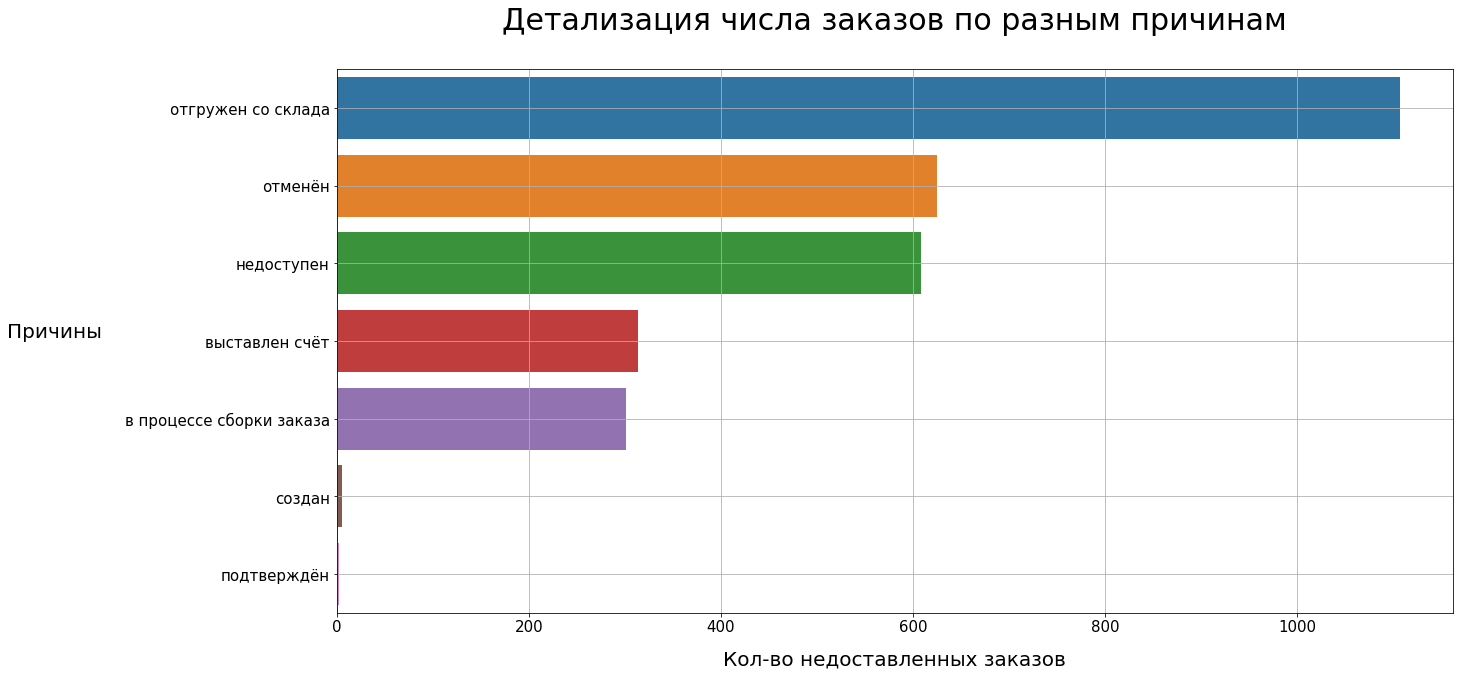

In [390]:
# Размер графика
plt.figure(figsize=(20, 10))

# Нарисуем график
sns.barplot(data = undelivered_reasons_fulltime, 
             x = 'count_orders', 
             y = 'order_status') #hue='order_status'

# Отобразим легенду
# plt.legend(fontsize=15, loc=2) # выводим легенду 

# Сделаем подписи к графику
plt.title('Детализация числа заказов по разным причинам\n', fontsize=30)
plt.ylabel('Причины', fontsize=20, rotation=0, labelpad=70)
plt.xlabel('Кол-во недоставленных заказов', fontsize=20, rotation=0, labelpad=15)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=15) #range(len(labels)), labels, , rotation=45
plt.yticks(range(len(list_undelivered_reasons)), label, fontsize=15)

# Нарисуем сетку
plt.grid(visible=True, which='major', axis='both')
#plt.grid(visible=True, which='minor', axis='both')

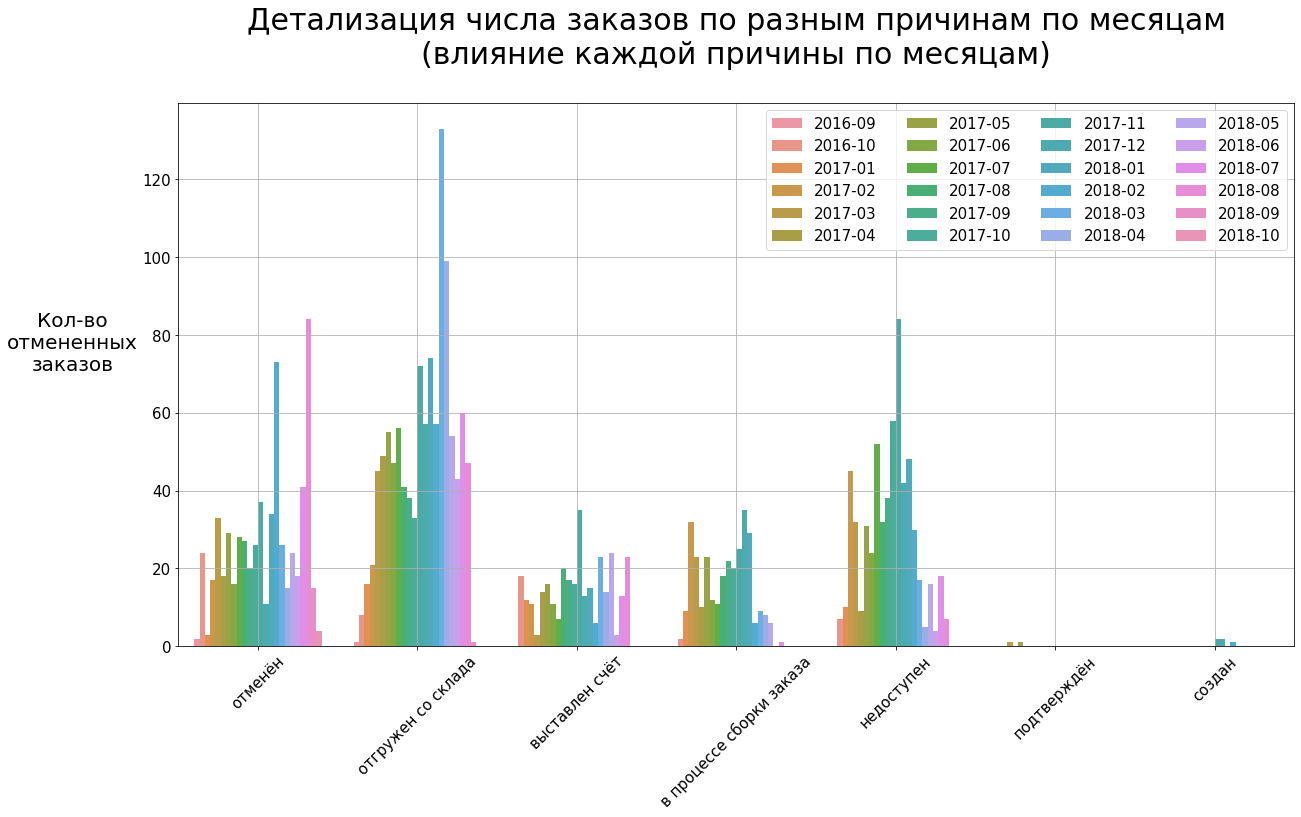

In [391]:
# Оценим влияние каждой причины по мясяцам
undelivered_reasons_month = undelivered_orders.groupby(["order_purchase_timestamp", 'order_status'],as_index=False)\
                                .agg({"order_id":'count'})\
                                .rename(columns={"order_id":"count_orders"})


# Размер графика
plt.figure(figsize=(20, 10))

# Построим график
sns.barplot(data = undelivered_reasons_month, 
             x = 'order_status', 
             y = 'count_orders', 
             hue='order_purchase_timestamp')


# Отобразим легенду
plt.legend(fontsize=15, loc=1, ncol=4) # выводим легенду 

# Сделаем подписи к графику
plt.title('Детализация числа заказов по разным причинам по месяцам\n(влияние каждой причины по месяцам)\n', fontsize=30)
plt.ylabel('Кол-во\nотмененных\nзаказов', fontsize=20, rotation=0, labelpad=70)
plt.xlabel('', fontsize=20, rotation=0, labelpad=15)

# Увеличим масштаб подписей осей
plt.xticks(range(7),  list(dict_labels.values()), fontsize=15, rotation=45) #range(len(labels)), labels, , 
plt.yticks(fontsize=15) #range(len(labels)), labels, 

# Нарисуем сетку
plt.grid(visible=True, which='major', axis='both')
#plt.grid(visible=True, which='minor', axis='both')

<H1> 3 ШАГ:<BR>
    <blockquote>
        ОПРЕДЕЛИМ ПО КАЖДОМУ ТОВАРУ,<br>
        В КАКОЙ ДЕНЬ НЕДЕЛИ ТОВАР ЧАЩЕ ВСЕГО ПОКУПАЕТСЯ
    </blockquote>
</H1>

In [392]:
"""
В данном случае, имеет смысл считать покупкой - ФАКТ (ВРЕМЯ) СОЗДАНИЯ ЗАКАЗА
Так как пользователи совершают покупки(заказы) исходя из определенных дней, акций, событий,
а вот получают заказ в любое рандомное время как им удобно!!!
Поэтому ориентироваться следует на order_purchase_timestamp —  время создания заказа

А также заказ ДОЛЖЕН БЫТЬ ОПЛАЧЕН И ДОСТАВЛЕН
Но стоит помнимать, что формирование заказа (чека) может быть в 1 день, а вот оплата может быть уже
когда удобно пользователю. Доставка уже идет, а пользователь волен оплачивать в любое время до получения заказа!!!
"""


# Для начала смерджим df_items и df_orders по колонке 'order_id'
product_orders = df_items.merge(df_orders, how="left", on='order_id')
# Заказ оформлен, оплачен, доставлен и получен
product_orders = product_orders.query("order_purchase_timestamp  != 'NaN' & order_approved_at != 'NaN' & order_status == 'delivered'")


# Используем колонку - время создания заказа ("order_purchase_timestamp")
# Преобразуем дни в номера дней недели для поиска медианы
#product_orders.order_purchase_timestamp = product_orders.order_purchase_timestamp.dt.weekday
product_orders.order_purchase_timestamp = product_orders.order_purchase_timestamp.dt.day_name()


# Создадим DF частоты покупаемых товаром по дням недели
# Посчитаем частоту покупки по дню и товару
# Отсортируем по убыванию частоты
freq_iday = pd.DataFrame(product_orders[["product_id","order_purchase_timestamp"]].value_counts())\
           .reset_index()\
           .rename(columns={0:"freq_items_in_day"})\
            .sort_values('freq_items_in_day', ascending=False)
freq_iday                                  

,product_id,order_purchase_timestamp,freq_items_in_day
0,422879e10f46682990de24d770e7f83d,Wednesday,93
1,99a4788cb24856965c36a24e339b6058,Monday,91
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday,89
3,aca2eb7d00ea1a7b8ebd4e68314663af,Tuesday,85
4,aca2eb7d00ea1a7b8ebd4e68314663af,Friday,83
...,...,...,...
31883,47cc9106e1bc828d424f9439933ca075,Wednesday,1
31884,09cd1c07b1920158011ed5247fa5a65b,Thursday,1
31885,45bb83550ff78aa259858ff41921129a,Thursday,1
31886,4299211de0fa49785bb3115aa2b25c61,Wednesday,1


In [393]:
# Далее удалим все дубликаты"product_id" кроме первого (самого часто встречаемого)
freq_iday = freq_iday.drop_duplicates(subset="product_id",keep='first')
# Удалим частоту (тк она не нужна)
freq_iday = freq_iday.drop(columns="freq_items_in_day")

"""ОТВЕТ - DF в котором отражен наиболее частый день покупки уникального товара"""
print("Таблица наиболее популярных дней для заказа(покупки) товара")
freq_iday

Таблица наиболее популярных дней для заказа(покупки) товара


,product_id,order_purchase_timestamp
0,422879e10f46682990de24d770e7f83d,Wednesday
1,99a4788cb24856965c36a24e339b6058,Monday
2,aca2eb7d00ea1a7b8ebd4e68314663af,Thursday
8,53b36df67ebb7c41585e8d54d6772e08,Tuesday
12,389d119b48cf3043d311335e499d9c6b,Thursday
...,...,...
31881,093be8c4566a25d70e577faa3539d7d3,Wednesday
31882,47ccf73e45bf059c94e9d025329206ac,Tuesday
31884,09cd1c07b1920158011ed5247fa5a65b,Thursday
31885,45bb83550ff78aa259858ff41921129a,Thursday


DF в котором отражен наиболее частый день покупки уникального товара

<H1> 4 ШАГ:<BR>
    <blockquote>
        CКОЛЬКО У КАЖДОГО ИЗ ПОЛЬЗОВАТЕЛЕЙ В СРЕДНЕМ<br>ПОКУПОК В НЕДЕЛЮ (ПО МЕСЯЦАМ)?
    </blockquote>
</H1>
 <b><i>Не стоит забывать, что внутри месяца может быть не целое количество недель. <br>
 Например, в ноябре 2021 года 4,28 недели. И внутри метрики это нужно учесть.</b></i>

In [394]:
"""
В данном случае, имеет смысл считать покупкой - ФАКТ (ВРЕМЯ) СОЗДАНИЯ ЗАКАЗА
Так как пользователи совершают покупки(заказы) исходя из определенных дней, акций, событий,
а вот получают заказ в любое рандомное время как им удобно!!!
Поэтому ориентироваться следует на order_purchase_timestamp —  время создания заказа

А также заказ ДОЛЖЕН БЫТЬ ОПЛАЧЕН И ДОСТАВЛЕН
Но стоит помнимать, что формирование заказа (чека) может быть в 1 день, а вот оплата может быть уже
когда удобно пользователю. Доставка уже идет, а пользователь волен оплачивать в любое время до получения заказа!!!
"""

# Для начала нужно смерджить таблицы df_ids и df_orders 
# (пользователь по паспорту, а у одного пользователя мб нескольно id)
df_ids_orders = df_ids.merge(df_orders, how='left', on='customer_id')
# Условия покупки: Заказ оформлен, оплачен, доставлен и получен
df_ids_orders  = df_ids_orders.query("order_purchase_timestamp  != 'NaN' & order_approved_at != 'NaN' & order_status == 'delivered'")


# Словарь соответствия календарных месяцев и макс. кол-ва дней в месяцах
""" 2016-2018 - нет високосных годов, поэтому в феврале 28 дней """
dict_month = dict({1:31, 
                                       3:31,
                                       5:31,
                                       7:31,
                                       8:31,
                                       10:31,
                                       12:31,
                                       4:30,
                                       6:30,
                                       9:30,
                                       11:30,
                                       2:28})


# Преобразование данных в DF
df_ids_orders = df_ids_orders[['customer_unique_id', 'order_id', 'order_purchase_timestamp']]
df_ids_orders = df_ids_orders.assign(order_month = df_ids_orders.order_purchase_timestamp.dt.month)
df_ids_orders = df_ids_orders.assign(order_day_of_month = df_ids_orders.order_purchase_timestamp.dt.day)
df_ids_orders.order_purchase_timestamp = df_ids_orders.order_purchase_timestamp.dt.strftime('%Y-%m')

df_ids_orders = df_ids_orders.sort_values('order_purchase_timestamp',ascending=True)
df_ids_orders

,customer_unique_id,order_id,order_purchase_timestamp,order_month,order_day_of_month
21125,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09,9,15
54543,d0f63e7f9adb09e4efc7f4f276b977e4,9d664ec86be69d869bb6870294c4fdd8,2016-10,10,8
81367,2760aef7bd977a44aabf53f656e92722,03ffce741877a000ca0fb3520673d4c4,2016-10,10,5
76558,2557b9d6b7d5ca77ebc116062e558214,6ef172eee30cfbfa01516ce2eb2ee68f,2016-10,10,7
13002,b39c8c284dd7875b68a31449852cc76a,517e0a52c193102990befc46a5c5245a,2016-10,10,6
...,...,...,...,...,...
93227,c695342c19de857d6a0d52f4ce5e97c5,b313e45e823639cb00b2bbeca8ea7aa6,2018-08,8,9
48531,8a9c57817e183f35c53dcead46d75554,79ee6745e164245e776acc4bb4e37e3a,2018-08,8,8
80954,5a7ff7d4adb18a0d64314cc177a2f89a,ff3555a6834ab7c343f8b67157dfdd07,2018-08,8,5
60006,9414b67cf7f338e04d81f867351fd11c,69e9045bc98231a8e6e85723d88a9833,2018-08,8,15


In [395]:
# Функция подсчета числа недель в месяце
def number_weeks_in_month(series, dict_month):
    list_weeks = []
    for n_month in list(series):
        for key, value in dict_month.items():
            if n_month == key:
                list_weeks.append(value)
                break
    return list_weeks

In [396]:
#Вызовем функцию и создадим новую колонку с числом недель в месяце
list_weeks = number_weeks_in_month(df_ids_orders.order_month, dict_month)
df_ids_orders = df_ids_orders.assign(order_week_of_month = list_weeks)
df_ids_orders.order_week_of_month = df_ids_orders.order_week_of_month / 7
df_ids_orders

,customer_unique_id,order_id,order_purchase_timestamp,order_month,order_day_of_month,order_week_of_month
21125,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09,9,15,4.285714
54543,d0f63e7f9adb09e4efc7f4f276b977e4,9d664ec86be69d869bb6870294c4fdd8,2016-10,10,8,4.428571
81367,2760aef7bd977a44aabf53f656e92722,03ffce741877a000ca0fb3520673d4c4,2016-10,10,5,4.428571
76558,2557b9d6b7d5ca77ebc116062e558214,6ef172eee30cfbfa01516ce2eb2ee68f,2016-10,10,7,4.428571
13002,b39c8c284dd7875b68a31449852cc76a,517e0a52c193102990befc46a5c5245a,2016-10,10,6,4.428571
...,...,...,...,...,...,...
93227,c695342c19de857d6a0d52f4ce5e97c5,b313e45e823639cb00b2bbeca8ea7aa6,2018-08,8,9,4.428571
48531,8a9c57817e183f35c53dcead46d75554,79ee6745e164245e776acc4bb4e37e3a,2018-08,8,8,4.428571
80954,5a7ff7d4adb18a0d64314cc177a2f89a,ff3555a6834ab7c343f8b67157dfdd07,2018-08,8,5,4.428571
60006,9414b67cf7f338e04d81f867351fd11c,69e9045bc98231a8e6e85723d88a9833,2018-08,8,15,4.428571


In [397]:
# Посчитаем кол-во покупок на пользователя за месяц
df_ids_orders_numbweek = df_ids_orders.groupby(['customer_unique_id', 'order_purchase_timestamp', 'order_week_of_month'], as_index=False)\
                                      .agg({"order_id":"count"})\
                                      .sort_values('order_purchase_timestamp',ascending=True)\
                                      .rename(columns={'numbweek_month':'counts_orders_in_month'})
# Посчитаем среднее за месяц по неделям
df_ids_orders_numbweek.order_id = df_ids_orders_numbweek.order_id / df_ids_orders_numbweek.order_week_of_month

# Удалим колонку с количеством недель в месяце, тк она больше не требуется
df_ids_orders_numbweek = df_ids_orders_numbweek.drop(columns="order_week_of_month")

In [398]:
"""ОТВЕТ - DF в котором отражено среднее кол-во покупок у пользователей в неделю (по месяцам)"""
print("Таблица среднее кол-во покупок у пользователей в неделю (по месяцам)")
df_ids_orders_numbweek


Таблица среднее кол-во покупок у пользователей в неделю (по месяцам)


,customer_unique_id,order_purchase_timestamp,order_id
48809,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,0.233333
3069,0829f7df6577d5a4b65439bea701405f,2016-10,0.225806
43937,760337c825700b7db6d44a71c06753c8,2016-10,0.225806
45435,7a176e5d88c7acb6000a055e008c055d,2016-10,0.451613
45457,7a2679d6c164f6b6a2f36daf1b2fbc9d,2016-10,0.225806
...,...,...,...
26136,462ff63205c9198d9f958dc16618405e,2018-08,0.225806
26134,462f8d38d1ca830befd60355240fbe39,2018-08,0.225806
6108,104ae9a43b6e639f45bd5e3bc19210f3,2018-08,0.225806
60339,a22ee6bd65e350c2d1a0d9a12c2e465f,2018-08,0.225806


<H1> 5 ШАГ:<BR>
    <blockquote>
        КОГОРТНЫЙ АНАЛИЗ. <BR>ВЫЯВЛЕНИЕ КОГОРТЫ С САМЫМ ВЫСОКИМ RETENTION (УДЕРЖАНИЕМ) НА 3Й МЕСЯЦ.
    </blockquote>
</H1>
 <b><i>В ПЕРИОД С ЯНВАРЯ ПО ДЕКАБРЬ.</b></i>

In [399]:
# ПРОВЕРИМ ПОЛЬЗОВАТЕЛЕЙ, КОТОРЫЕ СОВЕРШАЮТ ПОКУПКИ (они приносят прибыль)
# Для начала нужно смерджить таблицы df_ids и df_orders 
# (пользователь по паспорту, а у одного пользователя мб нескольно id)
df_ids_orders = df_ids.merge(df_orders, how='left', on='customer_id')

# Условия покупки: Заказ оформлен, оплачен, доставлен и получен
df_ids_orders  = df_ids_orders.query("order_purchase_timestamp  != 'NaN' & order_approved_at != 'NaN' & order_status == 'delivered'")

# Зададим формат оформления заказа год-месяц
df_ids_orders.order_purchase_timestamp = df_ids_orders.order_purchase_timestamp.dt.strftime('%Y-%m')
df_ids_orders = df_ids_orders.sort_values('order_purchase_timestamp',ascending=True)

In [400]:
# Посчитаем число уникалиных пользователей (приносящих прибыль), совершавших покупки за 2017 год
# +2 месяца 2018 чтобы оценить удержание клиентов на 3й месяц
ncustomer_per_month = df_ids_orders.query('order_purchase_timestamp >= "2017-01" & order_purchase_timestamp <= "2018-02"')\
                                        .groupby(['order_purchase_timestamp'], as_index=False)\
                                        .agg({"customer_id":"nunique"})

# Создадим колонку с удержанием ( 748/2546 итд )
ncustomer_per_month["retention_rate"] = round(ncustomer_per_month.customer_id / ncustomer_per_month.customer_id.shift(-2), 3)
ncustomer_per_month

,order_purchase_timestamp,customer_id,retention_rate
0,2017-01,748,0.294
1,2017-02,1641,0.713
2,2017-03,2546,0.718
3,2017-04,2303,0.735
4,2017-05,3546,0.916
5,2017-06,3135,0.748
6,2017-07,3872,0.933
7,2017-08,4193,0.936
8,2017-09,4150,0.569
9,2017-10,4478,0.812


In [401]:
# Выявим максимальнный retention за выбранный промежуток времени
ncustomer_per_month.describe()[-1:]
"""
ОТВЕТ:
Когорта покупающих пользователей с "2017-11" показала наибольший RETENTION на 3й месяц.
"""
print(f"Когорта покупающих пользователей \
'{ncustomer_per_month.iloc[ncustomer_per_month.retention_rate.idxmax()].order_purchase_timestamp}' \
показала наибольший RETENTION = {ncustomer_per_month.iloc[ncustomer_per_month.retention_rate.idxmax()].retention_rate},\
 на 3й месяц.")

Когорта покупающих пользователей '2017-11' показала наибольший RETENTION = 1.031, на 3й месяц.


<H1> 6 ШАГ:<BR>
    <blockquote>
        RFM-СЕГМЕНТАЦИЯ ПОЛЬЗОВАТЕЛЕЙ.
    </blockquote>
</H1>
 <b><i>Часто для качественного анализа аудитории использую подходы, основанные на сегментации.<BR>
    Используя python, построй RFM-сегментацию пользователей, чтобы качественно оценить свою аудиторию. <BR>
    В кластеризации можешь выбрать следующие метрики: R - время от последней покупки пользователя до текущей даты, <BR>
        F - суммарное количество покупок у пользователя за всё время, M - сумма покупок за всё время. <BR>
        Подробно опиши, как ты создавал кластеры. Для каждого RFM-сегмента построй границы метрик recency, <BR>
        frequency и monetary для интерпретации этих кластеров. Пример такого описания: RFM-сегмент 132 <BR>
            (recency=1, frequency=3, monetary=2) имеет границы метрик recency от 130 до 500 дней, <BR>
            frequency от 2 до 5 заказов в неделю, monetary от 1780 до 3560 рублей в неделю.</b></i>

In [402]:
# Для начала нужно смерджить таблицы df_ids и df_orders 
# (пользователь по паспорту, а у одного пользователя мб нескольно id)
df_ids_orders = df_ids.merge(df_orders, how='left', on='customer_id')
df_ids_orders_items = df_ids_orders.merge(df_items, how='left', on='order_id')

"""
Так как будет проводиться сегментация покупающих польщователей, то отсеим лишних пользователей по критерию ПОКУПКИ

ПОВТОРИМ ---
В данном случае, имеет смысл считать покупкой - ФАКТ (ВРЕМЯ) СОЗДАНИЯ ЗАКАЗА
Так как пользователи совершают покупки(заказы) исходя из определенных дней, акций, событий,
а вот получают заказ в любое рандомное время как им удобно!!!
Поэтому ориентироваться следует на order_purchase_timestamp —  время создания заказа

А также заказ ДОЛЖЕН БЫТЬ ОПЛАЧЕН И ДОСТАВЛЕН
Но стоит помнимать, что формирование заказа (чека) может быть в 1 день, а вот оплата может быть уже
когда удобно пользователю. Доставка уже идет, а пользовательно волен оплачивать в любое время до получения заказа!!!
"""
# Условия покупки: Заказ оформлен, оплачен, доставлен и получен
df_ids_orders_items  = df_ids_orders_items.query("order_purchase_timestamp  != 'NaN' & order_approved_at != 'NaN' & order_status == 'delivered'")

"""Время покупки - order_purchase_timestamp"""
# Для наглядности, стоит убрать лишние колонки
df_ids_orders_items = df_ids_orders_items[["customer_unique_id","order_id",  "order_purchase_timestamp", "price"]]
df_ids_orders_items = df_ids_orders_items.sort_values('order_purchase_timestamp',ascending=True)


In [403]:
print(f'Временные рамки данных: от {df_ids_orders_items.order_purchase_timestamp.min()} до {df_ids_orders_items.order_purchase_timestamp.max()}')

Временные рамки данных: от 2016-09-15 12:16:38 до 2018-08-29 15:00:37


In [404]:
# Опеределим нынешнюю дату и время
now = datetime.today().strftime("%Y-%m-%d %H:%M:%S")
now = datetime.strptime(now, '%Y-%m-%d %H:%M:%S')

In [405]:
# Сагрегируем кол-во покупок пользователем в один промежуток времени
df_ids_orders_items_customers = df_ids_orders_items.groupby(['customer_unique_id','order_id','order_purchase_timestamp'], as_index=False)\
                                                                                                .agg({"price":"sum"})\
                                                                                                .sort_values('order_purchase_timestamp',ascending=True)
df_ids_orders_items_customers

,customer_unique_id,order_id,order_purchase_timestamp,price
49477,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,134.97
19210,32ea3bdedab835c3aa6cb68ce66565ef,3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50,29.90
17916,2f64e403852e6893ae37485d5fcacdaf,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03 16:56:50,21.90
36964,61db744d2f835035a5625b59350c6b63,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03 21:13:36,36.49
53100,8d3a54507421dbd2ce0a1d58046826e0,d207cc272675637bfed0062edffd0818,2016-10-03 22:06:03,119.90
...,...,...,...,...
46074,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,63.90
34905,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,418.00
48299,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,45.90
69066,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,24.90


In [406]:
# Зададим cтоблец "Когда была последняя покупка"
df_ids_orders_items_customers["days_since_order"] = (now - df_ids_orders_items_customers.order_purchase_timestamp).dt.days
df_ids_orders_items_customers

,customer_unique_id,order_id,order_purchase_timestamp,price,days_since_order
49477,830d5b7aaa3b6f1e9ad63703bec97d23,bfbd0f9bdef84302105ad712db648a6c,2016-09-15 12:16:38,134.97,2606
19210,32ea3bdedab835c3aa6cb68ce66565ef,3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50,29.90,2588
17916,2f64e403852e6893ae37485d5fcacdaf,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03 16:56:50,21.90,2588
36964,61db744d2f835035a5625b59350c6b63,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03 21:13:36,36.49,2587
53100,8d3a54507421dbd2ce0a1d58046826e0,d207cc272675637bfed0062edffd0818,2016-10-03 22:06:03,119.90,2587
...,...,...,...,...,...
46074,7a22d14aa3c3599238509ddca4b93b01,52018484704db3661b98ce838612b507,2018-08-29 12:25:59,63.90,1893
34905,5c58de6fb80e93396e2f35642666b693,0b223d92c27432930dfe407c6aea3041,2018-08-29 14:18:23,418.00,1893
48299,7febafa06d9d8f232a900a2937f04338,168626408cb32af0ffaf76711caae1dc,2018-08-29 14:18:28,45.90,1893
69066,b701bebbdf478f5500348f03aff62121,03ef5dedbe7492bdae72eec50764c43f,2018-08-29 14:52:00,24.90,1893


In [407]:
# Найдем R - время от последней покупки пользователя до текущей даты
df_ids_orders_items_customers_r = df_ids_orders_items_customers.groupby(['customer_unique_id'], as_index=False)\
            .agg({"days_since_order":"min"})\
            .sort_values('customer_unique_id',ascending=True)\
            .rename(columns={'days_since_order':'r_metrics'})    
df_ids_orders_items_customers_r

,customer_unique_id,r_metrics
0,0000366f3b9a7992bf8c76cfdf3221e2,2004
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2007
2,0000f46a3911fa3c0805444483337064,2429
3,0000f6ccb0745a6a4b88665a16c9f078,2213
4,0004aac84e0df4da2b147fca70cf8255,2181
...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2339
93341,fffea47cd6d3cc0a88bd621562a9d061,2154
93342,ffff371b4d645b6ecea244b27531430a,2461
93343,ffff5962728ec6157033ef9805bacc48,2012


In [408]:
# Найдем M - сумму покупок за всё время
df_ids_orders_items_customers_m = df_ids_orders_items.groupby(['customer_unique_id'], as_index=False)\
                                         .agg({"price":"sum"})\
                                        .sort_values('customer_unique_id',ascending=True)\
                                         .rename(columns={'price':'m_metrics'})    
df_ids_orders_items_customers_m

,customer_unique_id,m_metrics
0,0000366f3b9a7992bf8c76cfdf3221e2,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,18.90
2,0000f46a3911fa3c0805444483337064,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,25.99
4,0004aac84e0df4da2b147fca70cf8255,180.00
...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,64.89
93342,ffff371b4d645b6ecea244b27531430a,89.90
93343,ffff5962728ec6157033ef9805bacc48,115.00


In [409]:
# Найдем F - суммарное количество покупок у пользователя за всё время
df_ids_orders_items_customers_f = df_ids_orders_items.groupby(['customer_unique_id'], as_index=False)\
                                      .agg({"order_id":"count"})\
                                      .sort_values('customer_unique_id',ascending=True)\
                                      .rename(columns={'order_id':'f_metrics'})   
df_ids_orders_items_customers_f

,customer_unique_id,f_metrics
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2
93341,fffea47cd6d3cc0a88bd621562a9d061,1
93342,ffff371b4d645b6ecea244b27531430a,1
93343,ffff5962728ec6157033ef9805bacc48,1


In [410]:
# Cмерджим все метрики в однин DF
df_rfm = df_ids_orders_items_customers_r\
                                         .merge(df_ids_orders_items_customers_f, how='left', on='customer_unique_id')\
                                        .merge(df_ids_orders_items_customers_m, how='left', on='customer_unique_id')
                                       
df_rfm

,customer_unique_id,r_metrics,f_metrics,m_metrics
0,0000366f3b9a7992bf8c76cfdf3221e2,2004,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2007,1,18.90
2,0000f46a3911fa3c0805444483337064,2429,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2213,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2181,1,180.00
...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2339,2,1570.00
93341,fffea47cd6d3cc0a88bd621562a9d061,2154,1,64.89
93342,ffff371b4d645b6ecea244b27531430a,2461,1,89.90
93343,ffff5962728ec6157033ef9805bacc48,2012,1,115.00


<h1><i>R-метрика (давность).</i></h1>
<blockquote>
Разделим метрику на 4 равные части.<br>
Метрика отражает давность последней покупки отностильно текущего дня!<br>
Было принято решение разделить на 4 равных части, тк текущий день - плавающая величина,<br>
и ровно (красиво) поделить метрику довольно тяжело.
    </blockquote>

In [411]:
"""давность"""
"""разделим R-"""

# тк как число дней - целочисленная единица, то округлим в большую сторону
list_Rq = [0.25, 0.5, 0.75]
dict_quantiles_r = pd.Series(df_rfm.r_metrics.unique()).quantile(q=list_Rq).round().to_dict()

print(f"Границы метрик (кластеры) для 'r_metrics'(чем больше дней, тем ниже группа/ранг):\n"\
      f"4 группа : до {dict_quantiles_r[list(dict_quantiles_r.keys())[0]]} дней;\n"\
      f"3 группа : от {dict_quantiles_r[list(dict_quantiles_r.keys())[0]]} до {dict_quantiles_r[list(dict_quantiles_r.keys())[1]]} дней;\n"\
      f"2 группа : от {dict_quantiles_r[list(dict_quantiles_r.keys())[1]]} до {dict_quantiles_r[list(dict_quantiles_r.keys())[2]]} дней;\n"\
      f"1 группа : от {dict_quantiles_r[list(dict_quantiles_r.keys())[2]]} дней.")

Границы метрик (кластеры) для 'r_metrics'(чем больше дней, тем ниже группа/ранг):
4 группа : до 2046.0 дней;
3 группа : от 2046.0 до 2198.0 дней;
2 группа : от 2198.0 до 2350.0 дней;
1 группа : от 2350.0 дней.


<h1><i>M-метрика (суммарная стоимость покупок за все время).</i></h1>
<blockquote>
Разделим метрику на 4 неравные части.<br>
С границами метрик - 10, 100, 1000 рублей.
Метрика отражает суммарную стоимость покупок за все время!<br>
    </blockquote>

In [412]:
"""cумма покупок"""
# m_metrics (сумма покупок) - разделим распределение кол-ва число покупок на 4 НЕРАВНЫХ части
list_Mq = [0.01181, 0.32821, 0.94326]
dict_quantiles_m = pd.Series(df_rfm.m_metrics.unique()).quantile(q=list_Mq).round().to_dict()

print(f"Границы метрик (кластеры) для 'm_metrics'(чем больше сумма покупок, тем выше группа/ранг):\n"\
      f"1 группа: до {dict_quantiles_m[list(dict_quantiles_m.keys())[0]]} рублей;\n"\
      f"2 группа: от {dict_quantiles_m[list(dict_quantiles_m.keys())[0]]} до {dict_quantiles_m[list(dict_quantiles_m.keys())[1]]} рублей;\n"\
      f"3 группа: от {dict_quantiles_m[list(dict_quantiles_m.keys())[1]]} до {dict_quantiles_m[list(dict_quantiles_m.keys())[2]]} рублей;\n"\
      f"4 группа: от {dict_quantiles_m[list(dict_quantiles_m.keys())[2]]} рублей.")

Границы метрик (кластеры) для 'm_metrics'(чем больше сумма покупок, тем выше группа/ранг):
1 группа: до 10.0 рублей;
2 группа: от 10.0 до 100.0 рублей;
3 группа: от 100.0 до 1000.0 рублей;
4 группа: от 1000.0 рублей.


<h1><i>F-метрика (суммарная число покупок за все время).</i></h1>
<blockquote>
Разделим метрику на 4 неравные части.<br>
С границами метрик - 3, 8, 16 штук.
Метрика отражает суммарную число покупок за все время!<br>
    </blockquote>

In [413]:
"""число покупок"""
# f_metrics (число покупок) - разделим распределение кол-ва число покупок на 4 НЕРАВНЫХ части
list_Fq = [0.1, 0.4, 0.8]
dict_quantiles_f = pd.Series(df_rfm.f_metrics.unique()).quantile(q=list_Fq).round().to_dict()

print(f"Границы метрик (кластеры) для 'f_metrics'(чем больше дней, тем ниже группа/ранг):\n"\
      f"1 группа : до {dict_quantiles_f[list(dict_quantiles_f.keys())[0]]} покупок;\n"\
      f"2 группа : от {dict_quantiles_f[list(dict_quantiles_f.keys())[0]]} до {dict_quantiles_f[list(dict_quantiles_f.keys())[1]]} покупок;\n"\
      f"3 группа : от {dict_quantiles_f[list(dict_quantiles_f.keys())[1]]} до {dict_quantiles_f[list(dict_quantiles_f.keys())[2]]} покупок;\n"\
      f"4 группа : от {dict_quantiles_f[list(dict_quantiles_f.keys())[2]]} покупок.")

Границы метрик (кластеры) для 'f_metrics'(чем больше дней, тем ниже группа/ранг):
1 группа : до 3.0 покупок;
2 группа : от 3.0 до 8.0 покупок;
3 группа : от 8.0 до 16.0 покупок;
4 группа : от 16.0 покупок.


In [414]:
# Опишем ф-и для присвоения рангов

# Ф-я для кол-ва дней с последней покупки от текущего дня
# Чем больше дней, тем меньше ранг
def rank_methods_R(x):
    if x <= dict_quantiles_r[list(dict_quantiles_r.keys())[0]]:
        return 4
    elif x <= dict_quantiles_r[list(dict_quantiles_r.keys())[1]]:
        return 3
    elif x <= dict_quantiles_r[list(dict_quantiles_r.keys())[2]]:
        return 2
    else:
        return 1
    
# Ф-я для общей суммы
# Чем больше сумма, тем больше и ранг
def rank_methods_M(x):
    if x <= dict_quantiles_m[list(dict_quantiles_m.keys())[0]]:
        return 1
    elif x <= dict_quantiles_m[list(dict_quantiles_m.keys())[1]]:
        return 2
    elif x <= dict_quantiles_m[list(dict_quantiles_m.keys())[2]]:
        return 3
    else:
        return 4    
    
# Ф-я для числа покупок
# Чем больше число, тем больше и ранг
def rank_methods_F(x):
    if x <= dict_quantiles_f[list(dict_quantiles_f.keys())[0]]:
        return 1
    elif x <= dict_quantiles_f[list(dict_quantiles_f.keys())[1]]:
        return 2
    elif x <= dict_quantiles_f[list(dict_quantiles_f.keys())[2]]:
        return 3
    else:
        return 4   

In [415]:
# Применим ф-и к DF для создания колонок с оценками (рангами)
df_rfm['R'] = df_rfm['r_metrics'].apply(lambda x: rank_methods_R(x))
df_rfm['F'] = df_rfm['f_metrics'].apply(lambda x: rank_methods_F(x))
df_rfm['M'] = df_rfm['m_metrics'].apply(lambda x: rank_methods_M(x))
df_rfm

,customer_unique_id,r_metrics,f_metrics,m_metrics,R,F,M
0,0000366f3b9a7992bf8c76cfdf3221e2,2004,1,129.90,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2007,1,18.90,4,1,2
2,0000f46a3911fa3c0805444483337064,2429,1,69.00,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2213,1,25.99,2,1,2
4,0004aac84e0df4da2b147fca70cf8255,2181,1,180.00,3,1,3
...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2339,2,1570.00,2,1,4
93341,fffea47cd6d3cc0a88bd621562a9d061,2154,1,64.89,3,1,2
93342,ffff371b4d645b6ecea244b27531430a,2461,1,89.90,1,1,2
93343,ffff5962728ec6157033ef9805bacc48,2012,1,115.00,4,1,3


In [416]:
# Объединим сегменты в 1 балл
df_rfm['RFM_score'] = df_rfm['R'].map(str) + df_rfm['F'].map(str) + df_rfm['M'].map(str)

df_rfm

,customer_unique_id,r_metrics,f_metrics,m_metrics,R,F,M,RFM_score
0,0000366f3b9a7992bf8c76cfdf3221e2,2004,1,129.90,4,1,3,413
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2007,1,18.90,4,1,2,412
2,0000f46a3911fa3c0805444483337064,2429,1,69.00,1,1,2,112
3,0000f6ccb0745a6a4b88665a16c9f078,2213,1,25.99,2,1,2,212
4,0004aac84e0df4da2b147fca70cf8255,2181,1,180.00,3,1,3,313
...,...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2339,2,1570.00,2,1,4,214
93341,fffea47cd6d3cc0a88bd621562a9d061,2154,1,64.89,3,1,2,312
93342,ffff371b4d645b6ecea244b27531430a,2461,1,89.90,1,1,2,112
93343,ffff5962728ec6157033ef9805bacc48,2012,1,115.00,4,1,3,413


In [417]:
print('Оценки RFM дают 4**3 = 64 сегмента. Это довольно много, с таким количеством не так просто работать.')
print(f"Количество уникальных сегментов в нашем DF составляет {len(sorted(list(df_rmf.RFM_score.unique())))}, это меньше 64, но все еще достаточно много.")

Оценки RFM дают 4**3 = 64 сегмента. Это довольно много, с таким количеством не так просто работать.
Количество уникальных сегментов в нашем DF составляет 40, это меньше 64, но все еще достаточно много.


In [418]:
# Cегментируем пользователей по R и F, тк сумма покупки M не сильно отращает лояльность пользователей
# Но сильно утежеляет сегментацию!!!

"""

1) Чемпионы 
    R[3-4] покупали не так давно
    F[3-4] c очень большим числом покупок
    
2) Потенциально лольные клиенты - 
    R[3-4] покупали не так давно
    F[2] c большим числом покупок
        
3) Новые клиенты - 
    R[3-4] покупали не так давно
    F[1] c малым числом покупок    
    
--------------------------------------------------------------------------------------------------------------------------

4) Лояльные клиенты
    R[2] покупали давно
    F[4-3] c очень большим числом покупок
    
5) Клиенты, требующие внимания - 
    R[2] покупали давно
    F[2-1] c средним ислом покупок

    
-------------------------------------------------------------------------------------------------------------------------------------

    
6) Клиенты, которых нужно возвращать - 
    R[1] покупали очень давно
    F[4-3] cо большим числом покупок  
    
7) Потеряные  клиенты - 
    R[1] покупали очень давно
    F[2-1] c малым числом покупок    

"""
'''#'''

'#'

In [419]:
# Присвоим сегменты DF

# Функция выбора сегмента
def rfm_segments(r_df, f_df):
    if (r_df == 4 or r_df == 3) and (f_df == 4 or f_df == 3): return 'Чемпион'
    elif (r_df == 4 or r_df == 3) and (f_df == 2): return 'Потенциально лояльный'
    elif (r_df == 4 or r_df == 3) and (f_df == 1): return 'Новичок'    
    elif (r_df == 2) and (f_df == 4 or f_df == 3): return 'Лояльный'   
    elif (r_df == 2) and (f_df == 2 or f_df == 1): return 'Требует внимания'     
    elif (r_df == 1) and (f_df == 4 or f_df == 3): return 'Требует возвращения'  
    else: return 'Потерянный'    #elif (r_df == 1) and (f_df == 2 or f_df == 1):   
    

        
# Вызовем функцию из 2 колонок DF и присвоим новой колонке результат
# Используем параметр axis=1, чтобы применять функцию к КАЖДОЙ СТРОКЕ DF, а не к каждому столбцу
df_rfm['segment'] = df_rfm.apply(lambda row:  rfm_segments(row['R'], row['F']), axis=1)  
        
df_rfm      

,customer_unique_id,r_metrics,f_metrics,m_metrics,R,F,M,RFM_score,segment
0,0000366f3b9a7992bf8c76cfdf3221e2,2004,1,129.90,4,1,3,413,Новичок
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2007,1,18.90,4,1,2,412,Новичок
2,0000f46a3911fa3c0805444483337064,2429,1,69.00,1,1,2,112,Потерянный
3,0000f6ccb0745a6a4b88665a16c9f078,2213,1,25.99,2,1,2,212,Требует внимания
4,0004aac84e0df4da2b147fca70cf8255,2181,1,180.00,3,1,3,313,Новичок
...,...,...,...,...,...,...,...,...,...
93340,fffcf5a5ff07b0908bd4e2dbc735a684,2339,2,1570.00,2,1,4,214,Требует внимания
93341,fffea47cd6d3cc0a88bd621562a9d061,2154,1,64.89,3,1,2,312,Новичок
93342,ffff371b4d645b6ecea244b27531430a,2461,1,89.90,1,1,2,112,Потерянный
93343,ffff5962728ec6157033ef9805bacc48,2012,1,115.00,4,1,3,413,Новичок


,segment,count_segment,%_segment
0,Новичок,63675,68.214687
1,Требует внимания,18738,20.073919
2,Потерянный,10095,10.814720
3,Потенциально лояльный,783,0.838824
4,Чемпион,43,0.046066
5,Лояльный,9,0.009642
6,Требует возвращения,2,0.002143


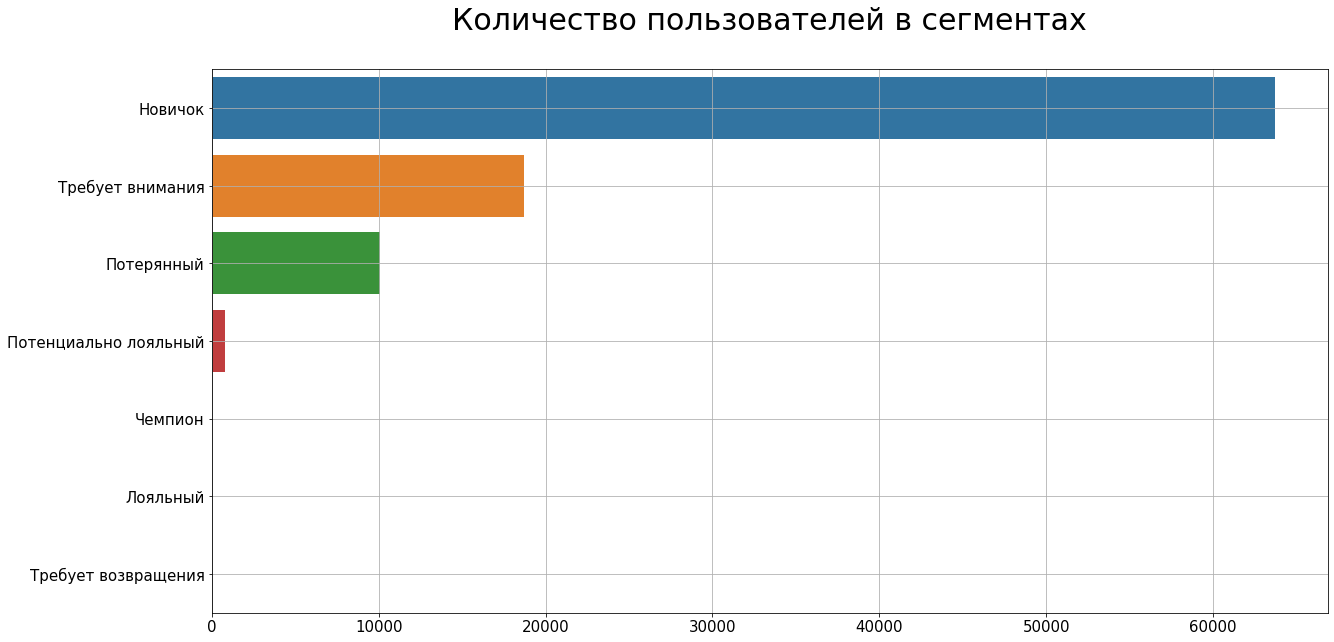

In [420]:
# Построим распределение кол-ва пользователей по сегментам
segment_df = df_rfm\
                                        .groupby('segment', as_index=False)\
                                        .agg({'customer_unique_id':'count'})\
                                        .rename(columns={'customer_unique_id':'count_segment'})\
                                        .sort_values("count_segment", ascending=False)

proc_seg = pd.DataFrame(df_rfm.segment\
                                                                            .value_counts(normalize=True))\
                                                                            .reset_index()\
                                                                            .rename(columns={"index":"segment","segment":"%_segment"})


proc_seg["%_segment"] = proc_seg["%_segment"].mul(100)

segment_df = segment_df.merge(proc_seg, how="left", on="segment")
# -------------------------------------------------------------------------------------------------------------------------------


# Размер графика
plt.figure(figsize=(20, 10))



# Нарисуем график
sns.barplot(data = segment_df, 
             x = 'count_segment', 
             y = 'segment' )



# Отобразим легенду
#plt.legend(fontsize=15, loc=3) # выводим легенду 

# Сделаем подписи к графику
plt.title('Количество пользователей в сегментах\n', fontsize=30)
plt.ylabel('', fontsize=20, rotation=0, labelpad=70)
plt.xlabel('', fontsize=20, rotation=0, labelpad=15)

# Увеличим масштаб подписей осей
plt.xticks(fontsize=15) #range(len(labels)), labels, , rotation=45
plt.yticks(fontsize=15)

# Нарисуем сетку
plt.grid(visible=True, which='major', axis='both')
#plt.grid(visible=True, which='minor', axis='both')

segment_df


Из данной таблицы и барплота видно распределение как абсолютное,<br>
так и процентное числа пользователей по ранее указынной сегментации этих <br>
смых пользователей. Можно видеть за кем следить, с кем работать плотнее и усерднее, сколько мы <br>
потеряли клиентов, сколько лояльных и чемпионов, с кем работать посредством скидок!!!<br>



<h1>ВЫВОДЫ:</h1>
<blockquote>
<ol>
<li>Определились с понятием ПОКУПКА<br>
    (что покупка это оформленный заказ, успешно оплаченный, и успешно полученный пользователем через некоторое время);</li>
<li>Определились с понятием ПОЛЬЗОВАТЕЛЬ (уникальный - 'customer_unique_id');</li>
<li>Посчитали число пользователей совершивших покупку только один раз = 90545 человек;</li>
<li>Посчитали число недоставленных заказов в среднем за месяц (за все время) по РАЗНЫМ причинам = 123;</li>
<li>Определили по каждому товару таблицу, в какой день чаще всего он покупается;</li>
<li>Определили по каждому пользователю таблицу, количества покупок в среднем в неделю по месяцам;</li>
<li>Провели когортный анализ пользователей, которые совершают ПОКУПКИ;</li>
<li>Произвели RFM сегментацию пользователей, вывели таблицу и барплот по количеству пользователей по сегментам.</li>
</ol>
        </blockquote>